In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
%config InlineBackend.figure_formats = ['svg']  # or svg
%matplotlib inline

# sns.set(context='notebook', style='whitegrid', font_scale=1.2)
import statsmodels.api as sm
from sklearn.metrics import mean_squared_error, mean_absolute_error
from sklearn.linear_model import LinearRegression, Lasso, LassoCV, Ridge, RidgeCV
from sklearn.metrics import r2_score

from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score


from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, PolynomialFeatures
from sklearn.pipeline import Pipeline

In [2]:
# load in our clean data frame
movie_df = pd.read_csv('./data/cleaned_movie_df_3rd.csv', index_col=0)
movie_df

link_stub  \
movie_title                                                                           
Avatar                                        /title/tt0499549/?ref_=bo_cso_table_1   
Avengers: Endgame                             /title/tt4154796/?ref_=bo_cso_table_2   
Titanic                                       /title/tt0120338/?ref_=bo_cso_table_3   
Star Wars: Episode VII - The Force Awakens    /title/tt2488496/?ref_=bo_cso_table_4   
Avengers: Infinity War                        /title/tt4154756/?ref_=bo_cso_table_5   
...                                                                             ...   
Baby It's You                               /title/tt0085208/?ref_=bo_cso_table_157   
Singin' in the Rain                         /title/tt0045152/?ref_=bo_cso_table_164   
A Better Life                               /title/tt1554091/?ref_=bo_cso_table_172   
Bitter Moon                                 /title/tt0104779/?ref_=bo_cso_table_175   
Rich Kids                                   /title/tt0079806/?ref_=bo_cso_table_198   

                                            worldwide_gross rating  \
movie_title                                                          
Avatar                                         2.847246e+09  PG-13   
Avengers: Endgame                              2.797501e+09  PG-13   
Titanic                                        2.201647e+09  PG-13   
Star Wars: Episode VII - The Force Awakens     2.069522e+09  PG-13   
Avengers: Infinity War                         2.048360e+09  PG-13   
...                                                     ...    ...   
Baby It's You                                  1.867792e+06      R   
Singin' in the Rain                            1.865056e+06      G   
A Better Life                                  1.863506e+06  PG-13   
Bitter Moon                                    1.862805e+06      R   
Rich Kids                                      1.856122e+06     PG   

                                                 budget  runtime release_date  \
movie_title                                                                     
Avatar                                      237000000.0    162.0   2009-12-16   
Avengers: Endgame                           356000000.0    181.0   2019-04-24   
Titanic                                     200000000.0    194.0   1997-12-19   
Star Wars: Episode VII - The Force Awakens  245000000.0    138.0   2015-12-16   
Avengers: Infinity War                      321000000.0    149.0   2018-04-25   
...                                                 ...      ...          ...   
Baby It's You                                 3000000.0    105.0   1983-03-04   
Singin' in the Rain                           2540800.0    103.0   1952-03-27   
A Better Life                                10000000.0     98.0   2011-06-24   
Bitter Moon                                   5000000.0    139.0   1994-03-18   
Rich Kids                                     2500000.0    101.0   1979-08-17   

                                                                    distributor  \
movie_title                                                                       
Avatar                                                    Twentieth Century Fox   
Avengers: Endgame                           Walt Disney Studios Motion Pictures   
Titanic                                                      Paramount Pictures   
Star Wars: Episode VII - The Force Awakens  Walt Disney Studios Motion Pictures   
Avengers: Infinity War                      Walt Disney Studios Motion Pictures   
...                                                                         ...   
Baby It's You                                                Paramount Pictures   
Singin' in the Rain                                   Metro-Goldwyn-Mayer (MGM)   
A Better Life                                              Summit Entertainment   
Bitter Moon                                                  Fin

#### Baseline model 1(quant variables only):  feature + budget + runtime

### Resulting R^2:  0.536

In [3]:
# lets first define our df, then create a pairplot

baseline_df = movie_df[['worldwide_gross', 'budget', 'runtime']]

sns.pairplot(baseline_df, height=1.2, plot_kws={'s': 6});

#### Seems to be a curvelinear relationship with budget could add a polynomial

<AxesSubplot:>

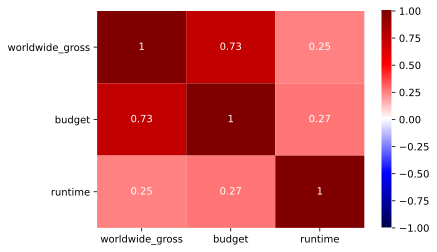

In [4]:
# Create a heatmap to view correlations

sns.heatmap(baseline_df.corr(), cmap='seismic', annot=True, vmin=-1, vmax=1)

In [5]:
# Fit model and score with stats model



X = baseline_df[['budget', 'runtime']]

y = baseline_df['worldwide_gross']

lr_1 = sm.OLS(y, sm.add_constant(X))

lr_1 = lr_1.fit()
lr_1.summary()



<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:        worldwide_gross   R-squared:                       0.536
Model:                            OLS   Adj. R-squared:                  0.536
Method:                 Least Squares   F-statistic:                     3343.
Date:                Fri, 06 Aug 2021   Prob (F-statistic):               0.00
Time:                        10:28:46   Log-Likelihood:            -1.1596e+05
No. Observations:                5782   AIC:                         2.319e+05
Df Residuals:                    5779   BIC:                         2.319e+05
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          -7e+07   9.65e+06     -7.251      0.000   -8.89e+07   -5.11e+07
budget         3.2105      0.042     77.019      0.000       3.129       3.292
runtime     5.297e+05   9.02e+04      5.873      0.000    3.53e+05    7.07e+05
==============================================================================
Omnibus:                     4925.337   Durbin-Watson:                   0.983
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           331208.925
Skew:                           3.691   Prob(JB):                         0.00
Kurtosis:                      39.336   Cond. No.                     3.17e+08
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 3.17e+08. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

#### Baseline -  Model 2: Add 2nd degree poly for budget

### Resulting R^2:  0.566

In [6]:

baseline_df['budget_x_2'] = baseline_df['budget']**2

<ipython-input-6-5643ed0a2bf7>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  baseline_df['budget_x_2'] = baseline_df['budget']**2


In [7]:
# Adds 0.03 to r2

X = baseline_df[['budget', 'runtime', 'budget_x_2']]

y = baseline_df['worldwide_gross']

lr_2 = sm.OLS(y, sm.add_constant(X))

lr_2 = lr_2.fit()
lr_2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:        worldwide_gross   R-squared:                       0.566
Model:                            OLS   Adj. R-squared:                  0.566
Method:                 Least Squares   F-statistic:                     3775.
Date:                Fri, 06 Aug 2021   Prob (F-statistic):               0.00
Time:                        10:28:46   Log-Likelihood:            -1.1576e+05
No. Observations:                5782   AIC:                         2.315e+05
Df Residuals:                    5779   BIC:                         2.316e+05
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       1771.3268    214.573      8.255      0.000    1350.684    2191.969
budget         1.3820      0.096     14.405      0.000       1.194       1.570
runtime     1.997e+05   2.42e+04      8.255      0.000    1.52e+05    2.47e+05
budget_x_2  1.077e-08   5.04e-10     21.388      0.000    9.78e-09    1.18e-08
==============================================================================
Omnibus:                     4482.808   Durbin-Watson:                   1.115
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           238351.690
Skew:                           3.243   Prob(JB):                         0.00
Kurtosis:                      33.778   Cond. No.                     4.87e+16
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 4.87e+16. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

<AxesSubplot:>

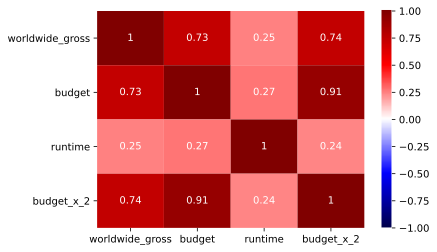

In [8]:
# Create a heatmap to view correlations

sns.heatmap(baseline_df.corr(), cmap='seismic', annot=True, vmin=-1, vmax=1)

In [9]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.2, random_state=42)

In [10]:
kf = KFold(n_splits=5, shuffle=True, random_state = 42)

In [11]:
# Run regression again using cross_validation on train and test sets

cv_lr_2 = LinearRegression()

cv_lr_2_score_train = cross_val_score(cv_lr_2, X_train, y_train, cv=kf, scoring='r2').mean()
cv_lr_2_score_test = cross_val_score(cv_lr_2, X_test, y_test, cv=kf, scoring='r2').mean()

print(f'CV Train Mean Score:  {cv_lr_2_score_train:.3f}')

print(f'CV Test Mean Score:  {cv_lr_2_score_test:.3f}')

CV Train Mean Score:  0.557
CV Test Mean Score:  0.577


In [12]:
movie_df[['worldwide_gross','budget']]

worldwide_gross       budget
movie_title                                                             
Avatar                                         2.847246e+09  237000000.0
Avengers: Endgame                              2.797501e+09  356000000.0
Titanic                                        2.201647e+09  200000000.0
Star Wars: Episode VII - The Force Awakens     2.069522e+09  245000000.0
Avengers: Infinity War                         2.048360e+09  321000000.0
...                                                     ...          ...
Baby It's You                                  1.867792e+06    3000000.0
Singin' in the Rain                            1.865056e+06    2540800.0
A Better Life                                  1.863506e+06   10000000.0
Bitter Moon                                    1.862805e+06    5000000.0
Rich Kids                                      1.856122e+06    2500000.0

[5782 rows x 2 columns]

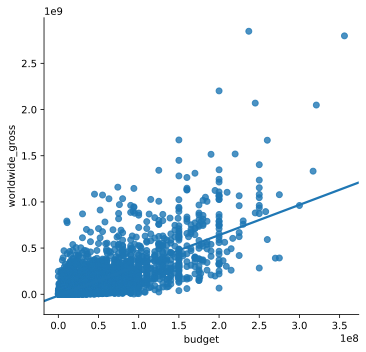

In [13]:

#Use Seaborn to fit a line to our data
sns.lmplot(x="budget", y="worldwide_gross", data=movie_df[['worldwide_gross','budget']], ci=False, truncate=False)

In [14]:
# lets add feature to our main df

movie_df['budget_x_2'] = movie_df['budget']**2

## Create dummy variables for categorical features


### 1) Release/Season

In [15]:
# 1st create function to convert date to season


def date_to_season(date):
    winter = [12, 1, 2]
    spring = [3, 4, 5]
    summer = [6, 7, 8]
    fall = [9, 10, 11]
    
    if date.month in winter:
        return "winter"
    elif date.month in spring:
        return "spring"
    elif date.month in summer:
        return "summer"
    else:
        return "fall"

In [16]:
movie_df['release_date'] = pd.to_datetime(movie_df['release_date'])

In [17]:
movie_df['release_date'][0]

Timestamp('2009-12-16 00:00:00')

In [18]:
movie_df['season'] = movie_df['release_date'].apply(date_to_season)
movie_df['season']

movie_title
Avatar                                        winter
Avengers: Endgame                             spring
Titanic                                       winter
Star Wars: Episode VII - The Force Awakens    winter
Avengers: Infinity War                        spring
                                               ...  
Baby It's You                                 spring
Singin' in the Rain                           spring
A Better Life                                 summer
Bitter Moon                                   spring
Rich Kids                                     summer
Name: season, Length: 5782, dtype: object

In [19]:
# create seasons dummy variable

seasons_dummies = pd.get_dummies(movie_df['season'], drop_first=True)

seasons_dummies.head(5)


spring  summer  winter
movie_title                                                       
Avatar                                           0       0       1
Avengers: Endgame                                1       0       0
Titanic                                          0       0       1
Star Wars: Episode VII - The Force Awakens       0       0       1
Avengers: Infinity War                           1       0       0

## 2) Genres

In [20]:
# Genres apprear to be in a list format...will need to change

movie_df['genres']

movie_title
Avatar                                        ['Action', 'Adventure', 'Fantasy', 'Sci-Fi']
Avengers: Endgame                               ['Action', 'Adventure', 'Drama', 'Sci-Fi']
Titanic                                                               ['Drama', 'Romance']
Star Wars: Episode VII - The Force Awakens               ['Action', 'Adventure', 'Sci-Fi']
Avengers: Infinity War                                   ['Action', 'Adventure', 'Sci-Fi']
                                                                  ...                     
Baby It's You                                               ['Comedy', 'Drama', 'Romance']
Singin' in the Rain                                       ['Comedy', 'Musical', 'Romance']
A Better Life                                                         ['Drama', 'Romance']
Bitter Moon                                               ['Drama', 'Romance', 'Thriller']
Rich Kids                                                              ['Comed

In [21]:
movie_df['genres'] = movie_df.genres.astype(str)
movie_df['genres'] = movie_df['genres'].str.replace(']','').str.replace('[','')

<ipython-input-21-db98c5fc1350>:2: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will*not* be treated as literal strings when regex=True.
  movie_df['genres'] = movie_df['genres'].str.replace(']','').str.replace('[','')


In [22]:
movie_df.genres

movie_title
Avatar                                        'Action', 'Adventure', 'Fantasy', 'Sci-Fi'
Avengers: Endgame                               'Action', 'Adventure', 'Drama', 'Sci-Fi'
Titanic                                                               'Drama', 'Romance'
Star Wars: Episode VII - The Force Awakens               'Action', 'Adventure', 'Sci-Fi'
Avengers: Infinity War                                   'Action', 'Adventure', 'Sci-Fi'
                                                                 ...                    
Baby It's You                                               'Comedy', 'Drama', 'Romance'
Singin' in the Rain                                       'Comedy', 'Musical', 'Romance'
A Better Life                                                         'Drama', 'Romance'
Bitter Moon                                               'Drama', 'Romance', 'Thriller'
Rich Kids                                                              'Comedy', 'Drama'
Name: gen

In [23]:
genres_dummies = movie_df['genres'].str.get_dummies(sep=', ')
genres_dummies

'Action'  'Adventure'  \
movie_title                                                         
Avatar                                             1            1   
Avengers: Endgame                                  1            1   
Titanic                                            0            0   
Star Wars: Episode VII - The Force Awakens         1            1   
Avengers: Infinity War                             1            1   
...                                              ...          ...   
Baby It's You                                      0            0   
Singin' in the Rain                                0            0   
A Better Life                                      0            0   
Bitter Moon                                        0            0   
Rich Kids                                          0            0   

                                            'Animation'  'Biography'  \
movie_title                                                            
Avatar                                                0            0   
Avengers: Endgame                                     0            0   
Titanic                                               0            0   
Star Wars: Episode VII - The Force Awakens            0            0   
Avengers: Infinity War                                0            0   
...                                                 ...          ...   
Baby It's You                                         0            0   
Singin' in the Rain                                   0            0   
A Better Life                                         0            0   
Bitter Moon                                           0            0   
Rich Kids                                             0            0   

                                            'Comedy'  'Crime'  'Documentary'  \
movie_title                                                                    
Avatar                                             0        0              0   
Avengers: Endgame                                  0        0              0   
Titanic                                            0        0              0   
Star Wars: Episode VII - The Force Awakens         0        0              0   
Avengers: Infinity War                             0        0              0   
...                                              ...      ...            ...   
Baby It's You                                      1        0              0   
Singin' in the Rain                                1        0              0   
A Better Life                                      0        0              0   
Bitter Moon                                        0        0              0   
Rich Kids                                          1        0              0   

                                            'Drama'  'Family'  'Fantasy'  ...  \
movie_title                                                               ...   
Avatar                                            0         0          1  ...   
Avengers: Endgame                                 1         0          0  ...   
Titanic                                           1         0          0  ...   
Star Wars: Episode VII - The Force Awakens        0         0          0  ...   
Avengers: Infinity War                            0         0          0  ...   
...                                             ...       ...        ...  ...   
Baby It's You                                     1         0          0  ...   
Singin' in the Rain                               0         0          0  ...   
A Better Life                                     1         0          0  ...   
Bitter Moon                                       1         0          0  ...   
Rich Kids                                         1         0          0  ...   

                                            'Music'  'Musical'  'Mystery'  \
movie_title                          

In [24]:
genres_dummies.columns

Index([''Action'', ''Adventure'', ''Animation'', ''Biography'', ''Comedy'',
       ''Crime'', ''Documentary'', ''Drama'', ''Family'', ''Fantasy'',
       ''Film-Noir'', ''History'', ''Horror'', ''Music'', ''Musical'',
       ''Mystery'', ''News'', ''Romance'', ''Sci-Fi'', ''Sport'', ''Thriller'',
       ''War'', ''Western''],
      dtype='object')

### 3) Ratings

In [25]:
movie_df['rating'].unique()

array(['PG-13', 'PG', 'G', 'R', 'Not Rated', 'NC-17', 'Unrated'],
      dtype=object)

In [26]:
rating_counts = movie_df.rating.value_counts()
rating_counts

R            2572
PG-13        1864
PG           1072
G             159
Not Rated      95
NC-17          13
Unrated         7
Name: rating, dtype: int64

In [27]:
movie_df['rating'] = movie_df['rating'].replace('Unrated', 'Not Rated')

In [28]:
movie_df['rating'] = movie_df['rating'].replace('NC-17', 'Not Rated')

In [29]:
movie_df.rating.value_counts()

R            2572
PG-13        1864
PG           1072
G             159
Not Rated     115
Name: rating, dtype: int64

In [30]:
rating_dummies = pd.get_dummies(movie_df['rating'], drop_first=True)
rating_dummies.head(5)

Not Rated  PG  PG-13  R
movie_title                                                        
Avatar                                              0   0      1  0
Avengers: Endgame                                   0   0      1  0
Titanic                                             0   0      1  0
Star Wars: Episode VII - The Force Awakens          0   0      1  0
Avengers: Infinity War                              0   0      1  0

### 4) Distributors

In [31]:
movie_df['distributor'].nunique()

232

In [32]:
#lets create a tier system for distributors based on frequency distribtion
# Tier 1 > 200
# Tier 2:  60 to 199
# Tier 3 < 60
dist_counts =  movie_df['distributor'].value_counts()
dist_counts

Warner Bros.                           677
Universal Pictures                     570
Twentieth Century Fox                  493
Paramount Pictures                     451
Walt Disney Studios Motion Pictures    435
                                      ... 
Searchlight Pictures                     1
Wrekin Hill Entertainment                1
Mulberry Square                          1
Good Machine                             1
Chicago Pictures                         1
Name: distributor, Length: 232, dtype: int64

In [33]:
t1_dist = list(dist_counts[dist_counts >=200].index)
t1_dist

['Warner Bros.',
 'Universal Pictures',
 'Twentieth Century Fox',
 'Paramount Pictures',
 'Walt Disney Studios Motion Pictures',
 'Sony Pictures Entertainment (SPE)',
 'Lionsgate']

In [34]:

movie_df['distributor'] = movie_df['distributor'].replace(t1_dist, 'dist_tier_1')


In [35]:
t2_mask = (dist_counts>=60) & (dist_counts<200)
dist_counts[t2_mask]

Metro-Goldwyn-Mayer (MGM)    198
New Line Cinema              168
Miramax                      160
Columbia Pictures            137
Sony Pictures Classics       109
Fox Searchlight Pictures     107
TriStar Pictures             103
Focus Features                85
Orion Pictures                82
Screen Gems                   74
United Artists                63
The Weinstein Company         63
Name: distributor, dtype: int64

In [36]:
t2_dist = list(dist_counts[t2_mask].index)
t2_dist

['Metro-Goldwyn-Mayer (MGM)',
 'New Line Cinema',
 'Miramax',
 'Columbia Pictures',
 'Sony Pictures Classics',
 'Fox Searchlight Pictures',
 'TriStar Pictures',
 'Focus Features',
 'Orion Pictures',
 'Screen Gems',
 'United Artists',
 'The Weinstein Company']

In [37]:
movie_df['distributor'] = movie_df['distributor'].replace(t2_dist, 'dist_tier_2')

In [38]:
t3_dist = list(dist_counts[dist_counts < 60].index)
movie_df['distributor'] = movie_df['distributor'].replace(t3_dist, 'dist_tier 3')

In [39]:

movie_df['distributor'].value_counts()

dist_tier_1    3206
dist_tier_2    1349
dist_tier 3    1227
Name: distributor, dtype: int64

In [40]:
distributor_dummies = pd.get_dummies(movie_df['distributor'], drop_first=True)

### 5) Producers

In [41]:
movie_df['producer'].nunique()

2526

In [42]:
prod_counts =  movie_df['producer'].value_counts()
prod_counts

Tim Bevan            47
Brian Grazer         44
Jerry Bruckheimer    37
John Davis           36
Jason Blum           34
                     ..
Scott Einbinder       1
James Garavente       1
Robert Towne          1
Tommy Oliver          1
Peter M. Cohen        1
Name: producer, Length: 2526, dtype: int64

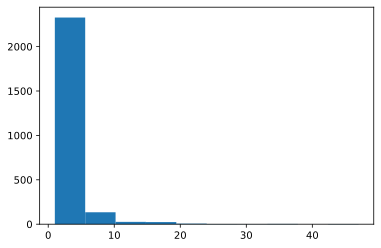

In [43]:
#lets create a tier system for producers based on frequency distribtion
# Tier 1 >= 20
# Tier 2:  10 to 20
# Tier 3:  5 to 9
# Tier 4 < 5

plt.hist(prod_counts);

In [44]:
t1_prod = list(prod_counts[prod_counts >=20].index)

movie_df['producer'] = movie_df['producer'].replace(t1_prod, 'prod_tier_1')

In [45]:
t2_prod_mask = (prod_counts>=10) & (prod_counts<20)
t2_prod = list(prod_counts[t2_prod_mask].index)
movie_df['producer'] = movie_df['producer'].replace(t2_prod, 'prod_tier_2')

In [46]:
t3_prod_mask = (prod_counts>=5) & (prod_counts<10)
t3_prod = list(prod_counts[t3_prod_mask].index)
movie_df['producer'] = movie_df['producer'].replace(t3_prod, 'prod_tier_3')

In [47]:
t4_prod = list(prod_counts[prod_counts < 5].index)

movie_df['producer'] = movie_df['producer'].replace(t4_prod, 'prod_tier_4')

In [48]:
movie_df['producer'].value_counts()

prod_tier_4    3292
prod_tier_3    1233
prod_tier_2     857
prod_tier_1     400
Name: producer, dtype: int64

In [49]:
producer_dummies = pd.get_dummies(movie_df['producer'], drop_first=True)

### 6) Director

In [50]:
movie_df['director'].nunique()

2250

In [51]:
dir_counts =  movie_df['director'].value_counts()
dir_counts

Woody Allen         38
Clint Eastwood      35
Steven Spielberg    31
Ridley Scott        24
Ron Howard          23
                    ..
Paul Miller          1
Daniel Lee           1
Pitof                1
Phil Roman           1
John N. Smith        1
Name: director, Length: 2250, dtype: int64

(array([1.917e+03, 2.280e+02, 7.200e+01, 1.600e+01, 1.100e+01, 2.000e+00,
        1.000e+00, 0.000e+00, 1.000e+00, 2.000e+00]),
 array([ 1. ,  4.7,  8.4, 12.1, 15.8, 19.5, 23.2, 26.9, 30.6, 34.3, 38. ]),
 <BarContainer object of 10 artists>)

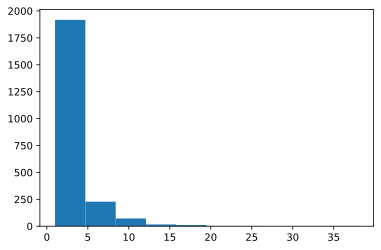

In [52]:
#lets create a tier system for producers based on frequency distribution
# Tier 1: >= 20
# Tier 2: 13 to 20
# Tier 3:  5 to 13
# Tier 4:  < 5

plt.hist(dir_counts)

In [53]:

t1_dir = list(dir_counts[dir_counts >=20].index)
movie_df['director'] = movie_df['director'].replace(t1_dir, 'dir_tier_1')




In [54]:
t2_dir_mask = (dir_counts>=13) & (dir_counts<20)
t2_dir = list(dir_counts[t2_dir_mask].index)
movie_df['director'] = movie_df['director'].replace(t2_dir, 'dir_tier_2')

In [55]:
t3_dir_mask = (dir_counts>=5) & (dir_counts<13)
t3_dir = list(dir_counts[t3_dir_mask].index)
movie_df['director'] = movie_df['director'].replace(t3_dir, 'dir_tier_3')

In [56]:
t4_dir = list(dir_counts[dir_counts < 5].index)
movie_df['director'] = movie_df['director'].replace(t4_dir, 'dir_tier_4')

In [57]:
movie_df['director'].value_counts()

dir_tier_4    3097
dir_tier_3    2098
dir_tier_2     416
dir_tier_1     171
Name: director, dtype: int64

### 7) Writer

In [58]:
movie_df['writer'].nunique()

3437

In [59]:
writer_counts = movie_df['writer'].value_counts()
writer_counts

Woody Allen      36
Stephen King     26
John Hughes      19
Tyler Perry      15
Joel Coen        13
                 ..
Marie Weiss       1
Robert Nathan     1
Danny Rubin       1
Jody Savin        1
Jan Skrentny      1
Name: writer, Length: 3437, dtype: int64

(array([3.277e+03, 1.250e+02, 2.800e+01, 3.000e+00, 1.000e+00, 1.000e+00,
        0.000e+00, 1.000e+00, 0.000e+00, 1.000e+00]),
 array([ 1. ,  4.5,  8. , 11.5, 15. , 18.5, 22. , 25.5, 29. , 32.5, 36. ]),
 <BarContainer object of 10 artists>)

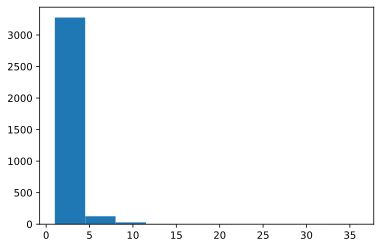

In [60]:
#lets create a tier system for writer based on frequency distribution
# Tier 1: >= 15
# Tier 2: 8 to 14
# Tier 3:  4 to 7
# Tier 4:  < 4

plt.hist(writer_counts)

In [61]:
t1_writer = list(writer_counts[writer_counts >= 15].index)
movie_df['writer'] = movie_df['writer'].replace(t1_writer, 'writer_tier_1')

In [62]:
t2_writer_mask = (writer_counts>=8) & (writer_counts<15)
t2_writer = list(writer_counts[t2_writer_mask].index)
movie_df['writer'] = movie_df['writer'].replace(t2_writer, 'writer_tier_2')

In [63]:
t3_writer_mask = (writer_counts>=4) & (writer_counts<8)
t3_writer = list(writer_counts[t3_writer_mask].index)
movie_df['writer'] = movie_df['writer'].replace(t3_writer, 'writer_tier_3')

In [64]:
t4_writer = list(writer_counts[writer_counts < 4].index)
movie_df['writer'] = movie_df['writer'].replace(t4_writer, 'writer_tier_4')

In [65]:
movie_df['writer'].value_counts()

writer_tier_4    4192
writer_tier_3    1203
writer_tier_2     291
writer_tier_1      96
Name: writer, dtype: int64

In [66]:
writer_dummies = pd.get_dummies(movie_df['writer'], drop_first=True)

In [67]:
writer_dummies

writer_tier_2  writer_tier_3  \
movie_title                                                                
Avatar                                                  1              0   
Avengers: Endgame                                       1              0   
Titanic                                                 1              0   
Star Wars: Episode VII - The Force Awakens              0              1   
Avengers: Infinity War                                  1              0   
...                                                   ...            ...   
Baby It's You                                           0              0   
Singin' in the Rain                                     0              0   
A Better Life                                           0              0   
Bitter Moon                                             0              0   
Rich Kids                                               0              0   

                                            writer_tier_4  
movie_title                                                
Avatar                                                  0  
Avengers: Endgame                                       0  
Titanic                                                 0  
Star Wars: Episode VII - The Force Awakens              0  
Avengers: Infinity War                                  0  
...                                                   ...  
Baby It's You                                           1  
Singin' in the Rain                                     1  
A Better Life                                           1  
Bitter Moon                                             1  
Rich Kids                                               1  

[5782 rows x 3 columns]

### Actors

In [68]:
movie_df['lead_actor_1'].nunique()

2012

In [69]:
actor_1_counts = movie_df['lead_actor_1'].value_counts()
actor_1_counts

Robert De Niro        41
Nicolas Cage          39
Tom Hanks             38
Sylvester Stallone    35
Clint Eastwood        34
                      ..
Michael Ealy           1
Zach Cregger           1
Tom Welling            1
Hideaki Itô            1
Ryan Kwanten           1
Name: lead_actor_1, Length: 2012, dtype: int64

In [70]:
actor_1_counts.std()

4.41258171270256

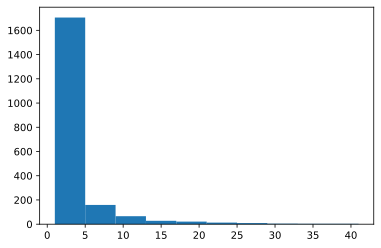

In [71]:
# Create different tiers based on frequency distribution
# tier 1 >= 20
# tier 2:  10 to 19
# tier 3:  5 to 9
# tier 4:  < 5

plt.hist(actor_1_counts);

In [72]:
t1_actor_1 = list(actor_1_counts[actor_1_counts >= 20].index)
movie_df['lead_actor_1'] = movie_df['lead_actor_1'].replace(t1_actor_1, 'actor1_tier_1')

In [73]:
t2_actor_1_mask = (actor_1_counts>=10) & (actor_1_counts<20)
t2_actor_1 = list(actor_1_counts[t2_actor_1_mask].index)
movie_df['lead_actor_1'] = movie_df['lead_actor_1'].replace(t2_actor_1, 'actor1_tier_2')

In [74]:
t3_actor_1_mask = (actor_1_counts>=5) & (actor_1_counts<10)
t3_actor_1 = list(actor_1_counts[t3_actor_1_mask].index)
movie_df['lead_actor_1'] = movie_df['lead_actor_1'].replace(t3_actor_1, 'actor1_tier_3')

In [75]:

t4_actor_1 = list(actor_1_counts[actor_1_counts < 5].index)
movie_df['lead_actor_1'] = movie_df['lead_actor_1'].replace(t4_actor_1, 'actor1_tier_4')

In [76]:
movie_df['lead_actor_1'].value_counts()

actor1_tier_4    2475
actor1_tier_3    1128
actor1_tier_2    1126
actor1_tier_1    1053
Name: lead_actor_1, dtype: int64

In [77]:
movie_df['lead_actor_2'].nunique()

2785

In [78]:
actor_2_counts = movie_df['lead_actor_2'].value_counts()
actor_2_counts

Samuel L. Jackson    21
Nicole Kidman        19
Tommy Lee Jones      17
Julianne Moore       16
Michelle Pfeiffer    16
                     ..
Bo Hopkins            1
Kristin Davis         1
Johnny Simmons        1
Devon Sawa            1
Stacy Keach           1
Name: lead_actor_2, Length: 2785, dtype: int64

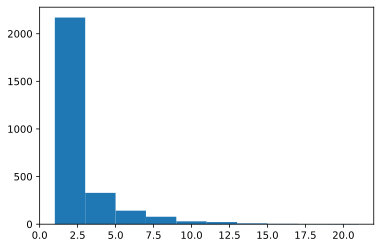

In [79]:
# Create different tiers based on frequency distribution
# tier 1 >= 12
# tier 2:  7 to 12
# tier 3:  3 to 7
# tier 4:  < 3

plt.hist(actor_2_counts);

In [80]:
t1_actor_2 = list(actor_2_counts[actor_2_counts >= 12].index)
movie_df['lead_actor_2'] = movie_df['lead_actor_2'].replace(t1_actor_2, 'actor2_tier_1')

In [81]:
movie_df['lead_actor_2'].value_counts()

actor2_tier_1       294
Ben Kingsley         11
Robert De Niro       11
Penélope Cruz        11
Jennifer Aniston     11
                   ... 
Ralph Ineson          1
Caitlin O'Heaney      1
Bo Hopkins            1
Kristin Davis         1
Stacy Keach           1
Name: lead_actor_2, Length: 2765, dtype: int64

In [82]:
t2_actor_2_mask = (actor_2_counts>=7) & (actor_2_counts<12)
t2_actor_2 = list(actor_2_counts[t2_actor_2_mask].index)
movie_df['lead_actor_2'] = movie_df['lead_actor_2'].replace(t2_actor_2, 'actor2_tier_2')

In [83]:
t3_actor_2_mask = (actor_2_counts>=3) & (actor_2_counts<7)
t3_actor_2 = list(actor_2_counts[t3_actor_2_mask].index)
movie_df['lead_actor_2'] = movie_df['lead_actor_2'].replace(t3_actor_2, 'actor2_tier_3')

In [84]:

t4_actor_2 = list(actor_2_counts[actor_2_counts < 3].index)
movie_df['lead_actor_2'] = movie_df['lead_actor_2'].replace(t4_actor_2, 'actor2_tier_4')

In [85]:
movie_df['lead_actor_2'].value_counts()

actor2_tier_4    2577
actor2_tier_3    1887
actor2_tier_2    1024
actor2_tier_1     294
Name: lead_actor_2, dtype: int64

In [86]:
movie_df['actor_3'].nunique()

3497

In [87]:
actor_3_counts = movie_df['actor_3'].value_counts()
actor_3_counts

Morgan Freeman        17
John Goodman          14
Samuel L. Jackson     12
Scarlett Johansson    12
Robert De Niro        10
                      ..
Peter Stebbings        1
Persis Khambatta       1
Jay Hernandez          1
Tisha Campbell         1
Ryan Kwanten           1
Name: actor_3, Length: 3497, dtype: int64

(array([2.954e+03, 3.770e+02, 6.600e+01, 7.400e+01, 7.000e+00, 1.500e+01,
        2.000e+00, 0.000e+00, 1.000e+00, 1.000e+00]),
 array([ 1. ,  2.6,  4.2,  5.8,  7.4,  9. , 10.6, 12.2, 13.8, 15.4, 17. ]),
 <BarContainer object of 10 artists>)

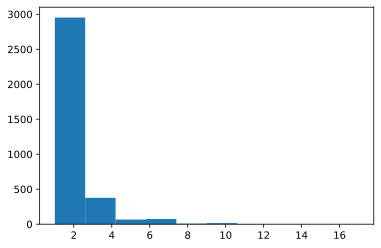

In [88]:
# Create different tiers based on frequency distribution
# tier 1 >= 12
# tier 2:  7 to 12
# tier 3:  3 to 7
# tier 4:  < 3

plt.hist(actor_3_counts)

In [89]:
t1_actor_3 = list(actor_3_counts[actor_3_counts >= 12].index)
movie_df['actor_3'] = movie_df['actor_3'].replace(t1_actor_3, 'actor3_tier_1')

In [90]:
t2_actor_3_mask = (actor_3_counts>=7) & (actor_3_counts<12)
t2_actor_3 = list(actor_3_counts[t2_actor_3_mask].index)
movie_df['actor_3'] = movie_df['actor_3'].replace(t2_actor_3, 'actor3_tier_2')

In [91]:
t3_actor_3_mask = (actor_3_counts>=3) & (actor_3_counts<7)
t3_actor_3 = list(actor_3_counts[t3_actor_3_mask].index)
movie_df['actor_3'] = movie_df['actor_3'].replace(t3_actor_3, 'actor3_tier_3')


In [92]:
t4_actor_3= list(actor_3_counts[actor_3_counts < 3].index)
movie_df['actor_3'] = movie_df['actor_3'].replace(t4_actor_3, 'actor3_tier_4')

In [93]:
actor_3_counts = movie_df['actor_3'].value_counts()
actor_3_counts

actor3_tier_4    3462
actor3_tier_3    1889
actor3_tier_2     376
actor3_tier_1      55
Name: actor_3, dtype: int64

In [94]:
lead_actor_1_dummies = pd.get_dummies(movie_df['lead_actor_1'], drop_first=True)
lead_actor_2_dummies = pd.get_dummies(movie_df['lead_actor_2'], drop_first=True)
actor_3_dummies = pd.get_dummies(movie_df['actor_3'], drop_first=True)

# REGRESSION WITH ALL OUR VARIABLES

In [95]:
movie_df

X = movie_df[['rating', 'budget', 'runtime',
       'distributor','director', 'writer',
       'producer', 'lead_actor_1', 'lead_actor_2', 'actor_3',
       'season', 'budget_x_2']]

#X = X.merge(genres_dummies, left_index=True, right_index=True)
y = movie_df['worldwide_gross']

In [96]:
# Convert categoricals to dummies

X_plus_dum = pd.get_dummies(X)
X_plus_dum

budget  runtime  \
movie_title                                                        
Avatar                                      237000000.0    162.0   
Avengers: Endgame                           356000000.0    181.0   
Titanic                                     200000000.0    194.0   
Star Wars: Episode VII - The Force Awakens  245000000.0    138.0   
Avengers: Infinity War                      321000000.0    149.0   
...                                                 ...      ...   
Baby It's You                                 3000000.0    105.0   
Singin' in the Rain                           2540800.0    103.0   
A Better Life                                10000000.0     98.0   
Bitter Moon                                   5000000.0    139.0   
Rich Kids                                     2500000.0    101.0   

                                              budget_x_2  rating_G  \
movie_title                                                          
Avatar                                      5.616900e+16         0   
Avengers: Endgame                           1.267360e+17         0   
Titanic                                     4.000000e+16         0   
Star Wars: Episode VII - The Force Awakens  6.002500e+16         0   
Avengers: Infinity War                      1.030410e+17         0   
...                                                  ...       ...   
Baby It's You                               9.000000e+12         0   
Singin' in the Rain                         6.455665e+12         1   
A Better Life                               1.000000e+14         0   
Bitter Moon                                 2.500000e+13         0   
Rich Kids                                   6.250000e+12         0   

                                            rating_Not Rated  rating_PG  \
movie_title                                                               
Avatar                                                     0          0   
Avengers: Endgame                                          0          0   
Titanic                                                    0          0   
Star Wars: Episode VII - The Force Awakens                 0          0   
Avengers: Infinity War                                     0          0   
...                                                      ...        ...   
Baby It's You                                              0          0   
Singin' in the Rain                                        0          0   
A Better Life                                              0          0   
Bitter Moon                                                0          0   
Rich Kids                                                  0          1   

                                            rating_PG-13  rating_R  \
movie_title                                                          
Avatar                                                 1         0   
Avengers: Endgame                                      1         0   
Titanic                                                1         0   
Star Wars: Episode VII - The Force Awakens             1         0   
Avengers: Infinity War                                 1         0   
...                                                  ...       ...   
Baby It's You                                          0         1   
Singin' in the Rain                                    0         0   
A Better Life                                          1         0   
Bitter Moon                                            0         1   
Rich Kids                                              0         0   

                                            distributor_dist_tier 3  \
movie_title                                                           
Avatar                                                            0   
Avengers: Endgame                                                 0   
Titanic                                                           0   
Star Wars: 

In [97]:
X_plus_dum.reset_index(inplace=True)
X_plus_dum

movie_title       budget  runtime  \
0                                         Avatar  237000000.0    162.0   
1                              Avengers: Endgame  356000000.0    181.0   
2                                        Titanic  200000000.0    194.0   
3     Star Wars: Episode VII - The Force Awakens  245000000.0    138.0   
4                         Avengers: Infinity War  321000000.0    149.0   
...                                          ...          ...      ...   
5777                               Baby It's You    3000000.0    105.0   
5778                         Singin' in the Rain    2540800.0    103.0   
5779                               A Better Life   10000000.0     98.0   
5780                                 Bitter Moon    5000000.0    139.0   
5781                                   Rich Kids    2500000.0    101.0   

        budget_x_2  rating_G  rating_Not Rated  rating_PG  rating_PG-13  \
0     5.616900e+16         0                 0          0             1   
1     1.267360e+17         0                 0          0             1   
2     4.000000e+16         0                 0          0             1   
3     6.002500e+16         0                 0          0             1   
4     1.030410e+17         0                 0          0             1   
...            ...       ...               ...        ...           ...   
5777  9.000000e+12         0                 0          0             0   
5778  6.455665e+12         1                 0          0             0   
5779  1.000000e+14         0                 0          0             1   
5780  2.500000e+13         0                 0          0             0   
5781  6.250000e+12         0                 0          1             0   

      rating_R  distributor_dist_tier 3  ...  lead_actor_2_actor2_tier_3  \
0            0                        0  ...                           1   
1            0                        0  ...                           0   
2            0                        0  ...                           0   
3            0                        0  ...                           1   
4            0                        0  ...                           1   
...        ...                      ...  ...                         ...   
5777         1                        0  ...                           0   
5778         0                        0  ...                           0   
5779         0                        1  ...                           0   
5780         1                        1  ...                           0   
5781         0                        0  ...                           0   

      lead_actor_2_actor2_tier_4  actor_3_actor3_tier_1  \
0                              0                      0   
1                              0                      0   
2                              0                      0   
3                              0                      0   
4                              0                      0   
...                          ...                    ...   
5777                           1                      0   
5778                           1                      0   
5779                           1                      0   
5780                           0                      0   
5781                           1                      0   

      actor_3_actor3_tier_2  actor_3_actor3_tier_3  actor_3_actor3_tier_4  \
0                         1                      0                      0   
1                         1                      0                      0   
2                         0                      0                      1   
3                         1                      0                      0   
4                         1                      0                      0   
...                     ...                    ...                    ...   
5777                      0                      0                      1   
5778     

In [98]:
genres_dummies.reset_index(inplace=True)
genres_dummies

movie_title  'Action'  'Adventure'  \
0                                         Avatar         1            1   
1                              Avengers: Endgame         1            1   
2                                        Titanic         0            0   
3     Star Wars: Episode VII - The Force Awakens         1            1   
4                         Avengers: Infinity War         1            1   
...                                          ...       ...          ...   
5777                               Baby It's You         0            0   
5778                         Singin' in the Rain         0            0   
5779                               A Better Life         0            0   
5780                                 Bitter Moon         0            0   
5781                                   Rich Kids         0            0   

      'Animation'  'Biography'  'Comedy'  'Crime'  'Documentary'  'Drama'  \
0               0            0         0        0              0        0   
1               0            0         0        0              0        1   
2               0            0         0        0              0        1   
3               0            0         0        0              0        0   
4               0            0         0        0              0        0   
...           ...          ...       ...      ...            ...      ...   
5777            0            0         1        0              0        1   
5778            0            0         1        0              0        0   
5779            0            0         0        0              0        1   
5780            0            0         0        0              0        1   
5781            0            0         1        0              0        1   

      'Family'  ...  'Music'  'Musical'  'Mystery'  'News'  'Romance'  \
0            0  ...        0          0          0       0          0   
1            0  ...        0          0          0       0          0   
2            0  ...        0          0          0       0          1   
3            0  ...        0          0          0       0          0   
4            0  ...        0          0          0       0          0   
...        ...  ...      ...        ...        ...     ...        ...   
5777         0  ...        0          0          0       0          1   
5778         0  ...        0          1          0       0          1   
5779         0  ...        0          0          0       0          1   
5780         0  ...        0          0          0       0          1   
5781         0  ...        0          0          0       0          0   

      'Sci-Fi'  'Sport'  'Thriller'  'War'  'Western'  
0            1        0           0      0          0  
1            1        0           0      0          0  
2            0        0           0      0          0  
3            1        0           0      0          0  
4            1        0           0      0          0  
...        ...      ...         ...    ...        ...  
5777         0        0           0      0          0  
5778         0        0           0      0          0  
5779         0        0           0      0          0  
5780         0        0           1      0          0  
5781         0        0           0      0          0  

[5782 rows x 24 columns]

In [99]:
# Merge genre dummy variables with dummy matrix for genres

X_merge = pd.merge(X_plus_dum, genres_dummies, right_index=True, left_index=True)

In [100]:
X_merge.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5782 entries, 0 to 5781
Data columns (total 64 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   movie_title_x               5782 non-null   object 
 1   budget                      5782 non-null   float64
 2   runtime                     5782 non-null   float64
 3   budget_x_2                  5782 non-null   float64
 4   rating_G                    5782 non-null   uint8  
 5   rating_Not Rated            5782 non-null   uint8  
 6   rating_PG                   5782 non-null   uint8  
 7   rating_PG-13                5782 non-null   uint8  
 8   rating_R                    5782 non-null   uint8  
 9   distributor_dist_tier 3     5782 non-null   uint8  
 10  distributor_dist_tier_1     5782 non-null   uint8  
 11  distributor_dist_tier_2     5782 non-null   uint8  
 12  director_dir_tier_1         5782 non-null   uint8  
 13  director_dir_tier_2         5782 

In [101]:
del X_merge['movie_title_y']
X_merge.rename(columns={'movie_title_x':'movie_title'}, inplace=True)
X_merge.set_index('movie_title', inplace=True)

In [102]:
X_merge

budget  runtime  \
movie_title                                                        
Avatar                                      237000000.0    162.0   
Avengers: Endgame                           356000000.0    181.0   
Titanic                                     200000000.0    194.0   
Star Wars: Episode VII - The Force Awakens  245000000.0    138.0   
Avengers: Infinity War                      321000000.0    149.0   
...                                                 ...      ...   
Baby It's You                                 3000000.0    105.0   
Singin' in the Rain                           2540800.0    103.0   
A Better Life                                10000000.0     98.0   
Bitter Moon                                   5000000.0    139.0   
Rich Kids                                     2500000.0    101.0   

                                              budget_x_2  rating_G  \
movie_title                                                          
Avatar                                      5.616900e+16         0   
Avengers: Endgame                           1.267360e+17         0   
Titanic                                     4.000000e+16         0   
Star Wars: Episode VII - The Force Awakens  6.002500e+16         0   
Avengers: Infinity War                      1.030410e+17         0   
...                                                  ...       ...   
Baby It's You                               9.000000e+12         0   
Singin' in the Rain                         6.455665e+12         1   
A Better Life                               1.000000e+14         0   
Bitter Moon                                 2.500000e+13         0   
Rich Kids                                   6.250000e+12         0   

                                            rating_Not Rated  rating_PG  \
movie_title                                                               
Avatar                                                     0          0   
Avengers: Endgame                                          0          0   
Titanic                                                    0          0   
Star Wars: Episode VII - The Force Awakens                 0          0   
Avengers: Infinity War                                     0          0   
...                                                      ...        ...   
Baby It's You                                              0          0   
Singin' in the Rain                                        0          0   
A Better Life                                              0          0   
Bitter Moon                                                0          0   
Rich Kids                                                  0          1   

                                            rating_PG-13  rating_R  \
movie_title                                                          
Avatar                                                 1         0   
Avengers: Endgame                                      1         0   
Titanic                                                1         0   
Star Wars: Episode VII - The Force Awakens             1         0   
Avengers: Infinity War                                 1         0   
...                                                  ...       ...   
Baby It's You                                          0         1   
Singin' in the Rain                                    0         0   
A Better Life                                          1         0   
Bitter Moon                                            0         1   
Rich Kids                                              0         0   

                                            distributor_dist_tier 3  \
movie_title                                                           
Avatar                                                            0   
Avengers: Endgame                                                 0   
Titanic                                                           0   
Star Wars: 

### Regression Model 3:  All dummies included
#### Train R2:  0.549
#### Test R2: 0.59

In [103]:
# split data into train and test sets

X_train, X_test, y_train, y_test = train_test_split(X_merge, y, test_size=.2, random_state=42)

In [104]:
X_train

budget  runtime    budget_x_2  \
movie_title                                                                     
Star Trek Beyond                           185000000.0    122.0  3.422500e+16   
Halloween 5: The Revenge of Michael Myers    5000000.0     96.0  2.500000e+13   
Violets Are Blue...                         10000000.0     88.0  1.000000e+14   
See No Evil, Hear No Evil                   18000000.0    103.0  3.240000e+14   
Rush                                        38000000.0    123.0  1.444000e+15   
...                                                ...      ...           ...   
Mortal Thoughts                              8000000.0    103.0  6.400000e+13   
Hamlet                                      18000000.0    242.0  3.240000e+14   
Sunset                                      16000000.0    102.0  2.560000e+14   
8 Heads in a Duffel Bag                      3000000.0     95.0  9.000000e+12   
Abominable                                  75000000.0     97.0  5.625000e+15   

                                           rating_G  rating_Not Rated  \
movie_title                                                             
Star Trek Beyond                                  0                 0   
Halloween 5: The Revenge of Michael Myers         0                 0   
Violets Are Blue...                               0                 0   
See No Evil, Hear No Evil                         0                 0   
Rush                                              0                 0   
...                                             ...               ...   
Mortal Thoughts                                   0                 0   
Hamlet                                            0                 0   
Sunset                                            0                 0   
8 Heads in a Duffel Bag                           0                 0   
Abominable                                        0                 0   

                                           rating_PG  rating_PG-13  rating_R  \
movie_title                                                                    
Star Trek Beyond                                   0             1         0   
Halloween 5: The Revenge of Michael Myers          0             0         1   
Violets Are Blue...                                0             1         0   
See No Evil, Hear No Evil                          0             0         1   
Rush                                               0             0         1   
...                                              ...           ...       ...   
Mortal Thoughts                                    0             0         1   
Hamlet                                             0             1         0   
Sunset                                             0             0         1   
8 Heads in a Duffel Bag                            0             0         1   
Abominable                                         1             0         0   

                                           distributor_dist_tier 3  \
movie_title                                                          
Star Trek Beyond                                                 0   
Halloween 5: The Revenge of Michael Myers                        1   
Violets Are Blue...                                              0   
See No Evil, Hear No Evil                                        0   
Rush                                                             0   
...                                                            ...   
Mortal Thoughts                                                  0   
Hamlet                                                           0   
Sunset                                                           0   
8 Heads in a Duffel Bag                                          0   
Abominable                                                       0   

                                           distributor_dist_tier_1  ...  \
movie_title      

In [105]:
kf = KFold(n_splits=5, shuffle=True, random_state = 42)

In [106]:
kf = KFold(n_splits=5, shuffle=True, random_state = 42)
lr_3 = LinearRegression()

cross_val_scores = cross_val_score(lr_3, X_train, y_train, # estimator, features, target
                cv=kf, # number of folds 
                scoring='r2')

cross_val_scores

array([0.5736869 , 0.5303783 , 0.58545612, 0.53268088, 0.56617522])

In [107]:
np.mean(cross_val_scores)

0.5576754829672323

In [108]:
#fit model on all X_train data
lr_3.fit(X_train, y_train)

LinearRegression()

In [109]:
# score training data
lr_3.score(X_train, y_train)

0.5601452222777212

In [110]:
# now score test data
lr_3.score(X_test, y_test)

0.5956770732761858

In [111]:
# Get list of coefficients

lr_3.coef_
columns = pd.get_dummies(X_train, drop_first=True).columns
list(zip(columns, lr_3.coef_))

[('budget', 1.3275460986396475),
 ('runtime', 541362.4247563021),
 ('budget_x_2', 1.0943040251731873e-08),
 ('rating_G', -372.45608555944636),
 ('rating_Not Rated', 545.1151596901982),
 ('rating_PG', -1596.9399420348054),
 ('rating_PG-13', -306.56785824737744),
 ('rating_R', 1730.8487261514274),
 ('distributor_dist_tier 3', -206.7304287569932),
 ('distributor_dist_tier_1', -365.6135984068678),
 ('distributor_dist_tier_2', 572.344027163901),
 ('director_dir_tier_1', 702.9564191800009),
 ('director_dir_tier_2', 709.3569786428741),
 ('director_dir_tier_3', 1270.430411762196),
 ('director_dir_tier_4', -2682.743809585063),
 ('writer_writer_tier_1', -115.87355943937405),
 ('writer_writer_tier_2', 316.7549641850935),
 ('writer_writer_tier_3', 39.25910554429083),
 ('writer_writer_tier_4', -240.1405102900144),
 ('producer_prod_tier_1', 8.670958694267938),
 ('producer_prod_tier_2', 214.24590885498765),
 ('producer_prod_tier_3', 443.75256262480616),
 ('producer_prod_tier_4', -666.6694301740608),


In [112]:
import scipy.stats as stats

In [113]:
def diagnostic_plots(y_pred, y_true, resid):
    fig, axes = plt.subplots(1, 3, figsize=(10, 4))

    g1 = sns.regplot(x=y_pred, y=y_true, ci=False, fit_reg=False, line_kws={'color': 'blue'}, ax=axes[0], scatter_kws={'s': 5})
    g1.set_xlabel('Predicted Target')
    g1.set_ylabel('True Target')
    g1.plot(y_true, y_true, '--', color='gray')

    g2 = sns.regplot(x=y_pred, y=resid, lowess=True, ax=axes[1], line_kws={'color': 'red'}, scatter_kws={'s': 5})
    g2.set_xlabel('Predicted Target')
    g2.set_ylabel('Residual')
    g2.axhline(y=0, color='gray', linestyle='--')

    stats.probplot(resid, dist="norm", plot=axes[2])

    fig.suptitle('Diagnostic Plots');
    fig.tight_layout();

In [114]:
y_pred = lr_3.predict(X_test)

In [115]:
residuals = y_test - y_pred


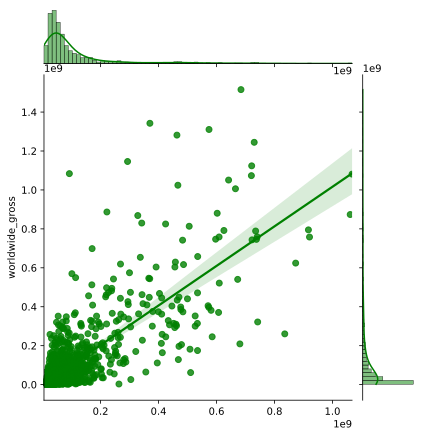

In [116]:
sns.jointplot(x=y_pred,y=y_test, kind='reg', color='g')

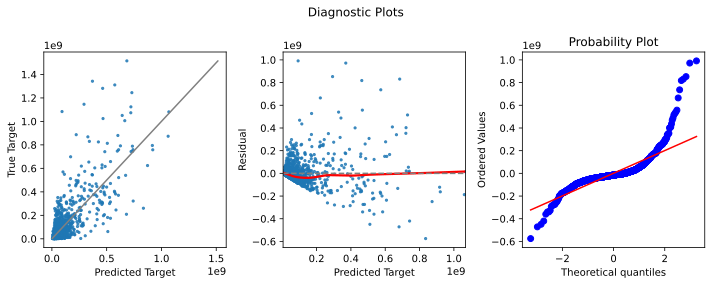

In [117]:
diagnostic_plots(y_pred, y_test, residuals)

In [118]:
rmse = mean_squared_error(y_test, y_pred, squared=False)
mae = mean_absolute_error(y_test, y_pred)
print("RSME:{}".format(rmse))
print("MAE:{}".format(mae))

RSME:117829134.48868898
MAE:64512935.43293178


#### Diagnostics do not look great, significant outliers, may need to take log of target

### Regression Model 4:  Take log of world wide ross

### Train R2:  0.444
### Test R2:  0.48

In [119]:
#y_log = np.log(movie_df['worldwide_gross'])
y_train_log = np.log10(y_train)

In [120]:
y_test_log = np.log10(y_test)

In [121]:
kf = KFold(n_splits=5, shuffle=True, random_state = 42)
lr_4 = LinearRegression()

cross_val_scores = cross_val_score(lr_4,X_train, y_train_log, # estimator, features, target
                cv=kf, # number of folds
                                   
                scoring='r2')

cross_val_scores

array([0.44828828, 0.40003902, 0.43382139, 0.46765917, 0.47499728])

In [122]:
np.mean(cross_val_scores)

0.4449610279978661

In [123]:
lr_4.fit(X_train, y_train_log)

LinearRegression()

In [124]:
lr_4.score(X_train, y_train_log)

0.4468563246962395

In [125]:
lr_4.score(X_test, y_test_log)

0.4854314273668343

#### Taking log made things worst...lets try Lasso instead


### Regresson Model 5: Lasso

#### Lasso Model Training R-sqr: 0.59
#### Lasso Model Test R-sqr:  0.62

In [126]:
X_merge['budget_std'] = (X_merge['budget'] - X_merge['budget'].mean())/X_merge['budget'].std()
X_merge

budget  runtime  \
movie_title                                                        
Avatar                                      237000000.0    162.0   
Avengers: Endgame                           356000000.0    181.0   
Titanic                                     200000000.0    194.0   
Star Wars: Episode VII - The Force Awakens  245000000.0    138.0   
Avengers: Infinity War                      321000000.0    149.0   
...                                                 ...      ...   
Baby It's You                                 3000000.0    105.0   
Singin' in the Rain                           2540800.0    103.0   
A Better Life                                10000000.0     98.0   
Bitter Moon                                   5000000.0    139.0   
Rich Kids                                     2500000.0    101.0   

                                              budget_x_2  rating_G  \
movie_title                                                          
Avatar                                      5.616900e+16         0   
Avengers: Endgame                           1.267360e+17         0   
Titanic                                     4.000000e+16         0   
Star Wars: Episode VII - The Force Awakens  6.002500e+16         0   
Avengers: Infinity War                      1.030410e+17         0   
...                                                  ...       ...   
Baby It's You                               9.000000e+12         0   
Singin' in the Rain                         6.455665e+12         1   
A Better Life                               1.000000e+14         0   
Bitter Moon                                 2.500000e+13         0   
Rich Kids                                   6.250000e+12         0   

                                            rating_Not Rated  rating_PG  \
movie_title                                                               
Avatar                                                     0          0   
Avengers: Endgame                                          0          0   
Titanic                                                    0          0   
Star Wars: Episode VII - The Force Awakens                 0          0   
Avengers: Infinity War                                     0          0   
...                                                      ...        ...   
Baby It's You                                              0          0   
Singin' in the Rain                                        0          0   
A Better Life                                              0          0   
Bitter Moon                                                0          0   
Rich Kids                                                  0          1   

                                            rating_PG-13  rating_R  \
movie_title                                                          
Avatar                                                 1         0   
Avengers: Endgame                                      1         0   
Titanic                                                1         0   
Star Wars: Episode VII - The Force Awakens             1         0   
Avengers: Infinity War                                 1         0   
...                                                  ...       ...   
Baby It's You                                          0         1   
Singin' in the Rain                                    0         0   
A Better Life                                          1         0   
Bitter Moon                                            0         1   
Rich Kids                                              0         0   

                                            distributor_dist_tier 3  \
movie_title                                                           
Avatar                                                            0   
Avengers: Endgame                                                 0   
Titanic                                                           0   
Star Wars: 

In [127]:
X_train, X_test, y_train, y_test = train_test_split(X_merge, y, test_size=.2, random_state=42)

In [128]:
X_train_quant = X_train[['budget', 'runtime', 'budget_x_2']]
X_test_quant = X_test[['budget', 'runtime', 'budget_x_2']]


In [129]:
# First need to standardize quantitative variables
std = StandardScaler()
std.fit(X_train_quant.values)

StandardScaler()

In [130]:
X_train_std  = std.transform(X_train_quant.values)
X_test_std = std.transform(X_test_quant.values)

In [131]:
X_train_std 

array([[ 3.76686327,  0.7271519 ,  4.12923632],
       [-0.73642431, -0.66502769, -0.36227109],
       [-0.61133299, -1.09339065, -0.35242129],
       ...,
       [-0.4612234 , -0.34375548, -0.33193371],
       [-0.78646084, -0.71857306, -0.36437238],
       [ 1.01485419, -0.61148232,  0.37318042]])

In [132]:
X_test_std

array([[-0.41118687, -0.61148232, -0.32300323],
       [-0.76144258,  0.94133338, -0.36345306],
       [-0.31111382,  1.20906022, -0.30199033],
       ...,
       [ 1.39012816,  1.04842411,  0.69822372],
       [ 1.26503683, -0.45084622,  0.58330942],
       [-0.33613208, -0.66502769, -0.30763755]])

In [133]:
X_train_dummies = X_train.loc[:,'rating_G':"'Western'"].values

In [134]:
X_test_dummies = X_test.loc[:,'rating_G':"'Western'"].values

In [135]:
X_train_std_dummies = np.concatenate((X_train_std, X_train_dummies), axis=1)
X_train_std_dummies

array([[ 3.76686327,  0.7271519 ,  4.12923632, ...,  1.        ,
         0.        ,  0.        ],
       [-0.73642431, -0.66502769, -0.36227109, ...,  1.        ,
         0.        ,  0.        ],
       [-0.61133299, -1.09339065, -0.35242129, ...,  0.        ,
         0.        ,  0.        ],
       ...,
       [-0.4612234 , -0.34375548, -0.33193371, ...,  1.        ,
         0.        ,  1.        ],
       [-0.78646084, -0.71857306, -0.36437238, ...,  0.        ,
         0.        ,  0.        ],
       [ 1.01485419, -0.61148232,  0.37318042, ...,  0.        ,
         0.        ,  0.        ]])

In [136]:
X_test_std_dummies = np.concatenate((X_test_std, X_test_dummies), axis=1)
X_test_std_dummies

array([[-0.41118687, -0.61148232, -0.32300323, ...,  1.        ,
         0.        ,  0.        ],
       [-0.76144258,  0.94133338, -0.36345306, ...,  0.        ,
         0.        ,  0.        ],
       [-0.31111382,  1.20906022, -0.30199033, ...,  0.        ,
         0.        ,  0.        ],
       ...,
       [ 1.39012816,  1.04842411,  0.69822372, ...,  1.        ,
         0.        ,  0.        ],
       [ 1.26503683, -0.45084622,  0.58330942, ...,  0.        ,
         0.        ,  0.        ],
       [-0.33613208, -0.66502769, -0.30763755, ...,  1.        ,
         0.        ,  0.        ]])

In [137]:
alphavec = 10**np.linspace(-2,5,200)

lasso_model = LassoCV(alphas = alphavec, cv=kf)
lasso_model.fit(X_train_std_dummies, y_train)

LassoCV(alphas=array([1.00000000e-02, 1.08436597e-02, 1.17584955e-02, 1.27505124e-02,
       1.38262217e-02, 1.49926843e-02, 1.62575567e-02, 1.76291412e-02,
       1.91164408e-02, 2.07292178e-02, 2.24780583e-02, 2.43744415e-02,
       2.64308149e-02, 2.86606762e-02, 3.10786619e-02, 3.37006433e-02,
       3.65438307e-02, 3.96268864e-02, 4.29700470e-02, 4.65952567e-02,
       5.05263107e-02, 5.47890118e-0...
       2.14614120e+04, 2.32720248e+04, 2.52353917e+04, 2.73644000e+04,
       2.96730241e+04, 3.21764175e+04, 3.48910121e+04, 3.78346262e+04,
       4.10265811e+04, 4.44878283e+04, 4.82410870e+04, 5.23109931e+04,
       5.67242607e+04, 6.15098579e+04, 6.66991966e+04, 7.23263390e+04,
       7.84282206e+04, 8.50448934e+04, 9.22197882e+04, 1.00000000e+05]),
        cv=KFold(n_splits=5, random_state=42, shuffle=True))

In [138]:
lasso_model.alpha_

100000.0

In [139]:
X_merge.loc[:,'budget':"'Western'"].columns

Index(['budget', 'runtime', 'budget_x_2', 'rating_G', 'rating_Not Rated',
       'rating_PG', 'rating_PG-13', 'rating_R', 'distributor_dist_tier 3',
       'distributor_dist_tier_1', 'distributor_dist_tier_2',
       'director_dir_tier_1', 'director_dir_tier_2', 'director_dir_tier_3',
       'director_dir_tier_4', 'writer_writer_tier_1', 'writer_writer_tier_2',
       'writer_writer_tier_3', 'writer_writer_tier_4', 'producer_prod_tier_1',
       'producer_prod_tier_2', 'producer_prod_tier_3', 'producer_prod_tier_4',
       'lead_actor_1_actor1_tier_1', 'lead_actor_1_actor1_tier_2',
       'lead_actor_1_actor1_tier_3', 'lead_actor_1_actor1_tier_4',
       'lead_actor_2_actor2_tier_1', 'lead_actor_2_actor2_tier_2',
       'lead_actor_2_actor2_tier_3', 'lead_actor_2_actor2_tier_4',
       'actor_3_actor3_tier_1', 'actor_3_actor3_tier_2',
       'actor_3_actor3_tier_3', 'actor_3_actor3_tier_4', 'season_fall',
       'season_spring', 'season_summer', 'season_winter', ''Action'',
       ''Ad

In [140]:
coeficients = list(zip(X_merge.loc[:,'budget':"'Western'"].columns, lasso_model.coef_))
coeficients

[('budget', 20532909.378840584),
 ('runtime', 20588974.73106583),
 ('budget_x_2', 95090823.3132448),
 ('rating_G', -5229572.236332202),
 ('rating_Not Rated', 0.0),
 ('rating_PG', 0.0),
 ('rating_PG-13', 7295748.339331105),
 ('rating_R', -2034536.93654629),
 ('distributor_dist_tier 3', -1917220.6013618724),
 ('distributor_dist_tier_1', 14966847.09090929),
 ('distributor_dist_tier_2', -0.0),
 ('director_dir_tier_1', 16112258.148495011),
 ('director_dir_tier_2', -13909214.318620732),
 ('director_dir_tier_3', 4340569.6714343475),
 ('director_dir_tier_4', -686363.9718024817),
 ('writer_writer_tier_1', -10543236.794301331),
 ('writer_writer_tier_2', 30066870.87287315),
 ('writer_writer_tier_3', 16790410.388157815),
 ('writer_writer_tier_4', -2453035.247152754),
 ('producer_prod_tier_1', -0.0),
 ('producer_prod_tier_2', 8650289.982885148),
 ('producer_prod_tier_3', 6215125.8955334),
 ('producer_prod_tier_4', -12712333.344010994),
 ('lead_actor_1_actor1_tier_1', 6929861.764696412),
 ('lead_act

In [141]:
def Convert(tup, di):
    for a, b in tup:
        di.setdefault(a, b)
    return di
      
# Driver Code    

coeff_dict = {}
print (Convert(coeficients, coeff_dict))

{'budget': 20532909.378840584, 'runtime': 20588974.73106583, 'budget_x_2': 95090823.3132448, 'rating_G': -5229572.236332202, 'rating_Not Rated': 0.0, 'rating_PG': 0.0, 'rating_PG-13': 7295748.339331105, 'rating_R': -2034536.93654629, 'distributor_dist_tier 3': -1917220.6013618724, 'distributor_dist_tier_1': 14966847.09090929, 'distributor_dist_tier_2': -0.0, 'director_dir_tier_1': 16112258.148495011, 'director_dir_tier_2': -13909214.318620732, 'director_dir_tier_3': 4340569.6714343475, 'director_dir_tier_4': -686363.9718024817, 'writer_writer_tier_1': -10543236.794301331, 'writer_writer_tier_2': 30066870.87287315, 'writer_writer_tier_3': 16790410.388157815, 'writer_writer_tier_4': -2453035.247152754, 'producer_prod_tier_1': -0.0, 'producer_prod_tier_2': 8650289.982885148, 'producer_prod_tier_3': 6215125.8955334, 'producer_prod_tier_4': -12712333.344010994, 'lead_actor_1_actor1_tier_1': 6929861.764696412, 'lead_actor_1_actor1_tier_2': 5882562.386636908, 'lead_actor_1_actor1_tier_3': -0.

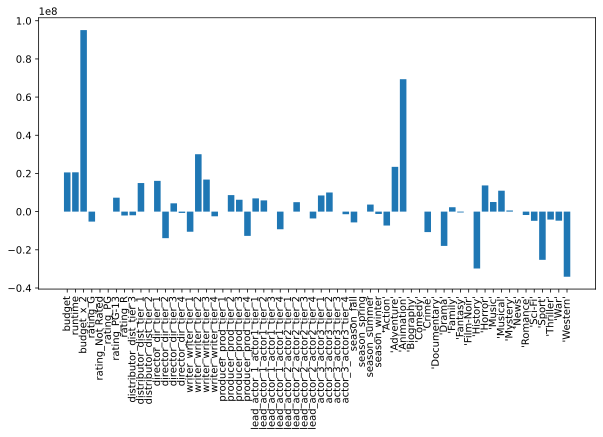

In [142]:
plt.figure(figsize=(10, 5))
plt.bar(range(len(coeff_dict)), list(coeff_dict.values()), align='center')
plt.xticks(range(len(coeff_dict)), list(coeff_dict.keys()))
plt.xticks(rotation=90);

In [143]:
#After numerous trial and error attempts in adjusting our range of alphas...
#...alpha did not seem to increase significantly past 

train_set_pred = lasso_model.predict(X_train_std_dummies)
test_set_pred = lasso_model.predict(X_test_std_dummies)

print(f' Lasso Model Training R-sqr: {r2_score(y_train, train_set_pred)}')
print(f' Lasso Model Test R-sqr:  {r2_score(y_test, test_set_pred)}')


 Lasso Model Training R-sqr: 0.5912553444986814
 Lasso Model Test R-sqr:  0.6160675705875243


In [144]:
rmse = mean_squared_error(y_test, test_set_pred, squared=False)
mae = mean_absolute_error(y_test, test_set_pred)
print(rmse)
print(mae)

114819566.25999822
64632321.015246116


In [145]:
residuals = y_test - test_set_pred

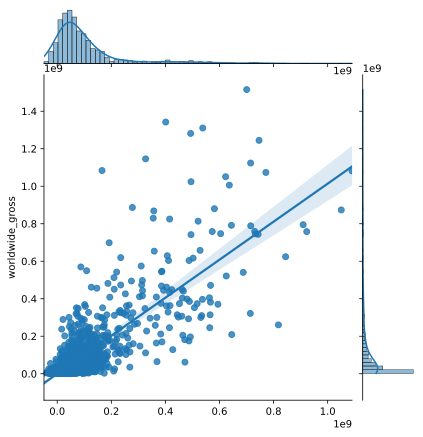

In [146]:
sns.jointplot(x=test_set_pred,y=y_test, kind='reg')

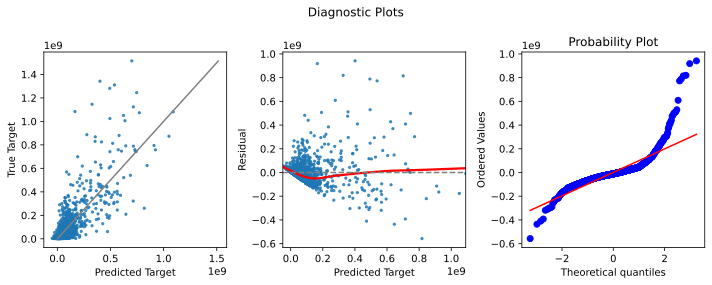

In [147]:
diagnostic_plots(test_set_pred, y_test, residuals)

### Regression Model 6:  Ridge

#### Ridge Model Training R-sqr: 0.59
#### Ridge Model Test R-sqr: 0.62

In [148]:
alphavec = 10**np.linspace(-2,-2,200)

ridge_model = RidgeCV(alphas = alphavec, cv=kf)
ridge_model.fit(X_train_std_dummies, y_train)

RidgeCV(alphas=array([0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01,
       0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01,
       0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01,
       0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01,
       0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01,
       0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.0...
       0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01,
       0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01,
       0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01,
       0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01,
       0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01,
       0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01,
       0.01, 0.01]),
        cv=KFold(n_splits=5, random_state=42, shuffle=True))

In [149]:
ridge_model.alpha_

0.01

In [150]:
train_set_pred = ridge_model.predict(X_train_std_dummies)

test_set_pred = ridge_model.predict(X_test_std_dummies)

print(f'Ridge Model Training R-sqr: {r2_score(y_train, train_set_pred)}')
print(f'Ridge Model Test R-sqr: {r2_score(y_test, test_set_pred)}')

Ridge Model Training R-sqr: 0.591543109418347
Ridge Model Test R-sqr: 0.6156574251617946


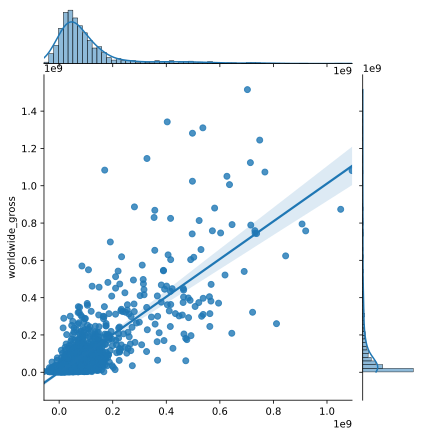

In [151]:
sns.jointplot(x=test_set_pred,y=y_test, kind='reg')

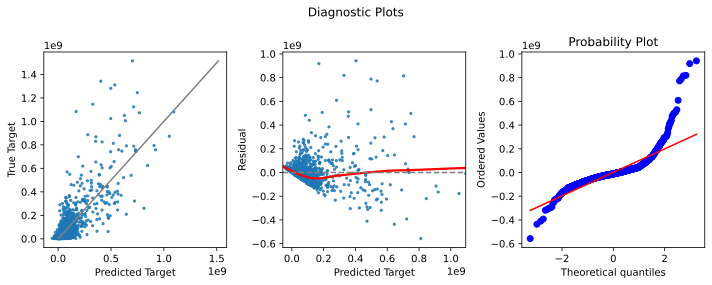

In [152]:
diagnostic_plots(test_set_pred, y_test, residuals)

In [153]:
rmse = mean_squared_error(y_test, test_set_pred, squared=False)
mae = mean_absolute_error(y_test, test_set_pred)
print(rmse)
print(mae)

114880879.32708803
65092856.73732829


#### Appears to be issues with our diagnositic plots, model breaks down at the extremes
#### Lets test how model performs at different stratas of budget

#### Typically Ridge would be used in predictive models, however, in this case..
#### ... we will use Lasso as it provides identical results to ridge with an intrepretability bonus


###### Individual Movie Predictions


lasso_model.predict(X_test_s1_std.reshape(1,-1))

In [154]:
X_train.reset_index(inplace=True)

In [155]:
X_test.reset_index(inplace=True)

In [156]:
def movie_prediction_error(movie, index, std_dataframe):
    gross = movie_df.loc[movie,'worldwide_gross']
    prediction = lasso_model.predict(std_dataframe[index].reshape(1,-1))
    error = prediction - gross
    perc_error = error/gross *100
    
    print(f'movie title: {movie}')
    print(f'gross: {gross}')
    print(f'prediction: {prediction}')
    print(f'error: {error}')
    print(f'perc_error: {perc_error}')      

In [157]:
movie_prediction_error('John Carter', 4032, X_train_std_dummies)

movie title: John Carter
gross: 284139100.0
prediction: [1.01737594e+09]
error: [7.33236844e+08]
perc_error: [258.05559458]


In [158]:
movie_prediction_error('My Big Fat Greek Wedding', 3363, X_train_std_dummies)

movie title: My Big Fat Greek Wedding
gross: 368744044.0
prediction: [35622223.61443379]
error: [-3.3312182e+08]
perc_error: [-90.33957994]


In [159]:
movie_prediction_error("A Beautiful Mind", 946, X_train_std_dummies)

movie title: A Beautiful Mind
gross: 316791257.0
prediction: [2.0615932e+08]
error: [-1.10631937e+08]
perc_error: [-34.92266105]


In [160]:
movie_prediction_error('Rambo', 392, X_test_std_dummies)

movie title: Rambo
gross: 113244290.0
prediction: [97369594.20758969]
error: [-15874695.79241031]
perc_error: [-14.01809821]


In [161]:
mask = (movie_df['budget'] < 75000000) & (movie_df['budget'] > 35000000) 

movie_df[mask].sample(30)

link_stub  \
movie_title                                                           
Me, Myself & Irene          /title/tt0183505/?ref_=bo_cso_table_167   
The Watch                   /title/tt1298649/?ref_=bo_cso_table_100   
Peter Rabbit                  /title/tt5117670/?ref_=bo_cso_table_2   
Exit Wounds                  /title/tt0242445/?ref_=bo_cso_table_36   
Inglourious Basterds         /title/tt0361748/?ref_=bo_cso_table_57   
Underworld: Evolution       /title/tt0401855/?ref_=bo_cso_table_123   
The House                   /title/tt4481514/?ref_=bo_cso_table_152   
The Town                    /title/tt0840361/?ref_=bo_cso_table_131   
Super Mario Bros.            /title/tt0108255/?ref_=bo_cso_table_89   
The Pacifier                 /title/tt0395699/?ref_=bo_cso_table_39   
City Hall                   /title/tt0115907/?ref_=bo_cso_table_163   
Grindhouse                  /title/tt0462322/?ref_=bo_cso_table_111   
Sherlock Gnomes              /title/tt2296777/?ref_=bo_cso_table_51   
Kangaroo Jack                /title/tt0257568/?ref_=bo_cso_table_71   
Back to the Future Part II   /title/tt0096874/?ref_=bo_cso_table_34   
Gone Girl                   /title/tt2267998/?ref_=bo_cso_table_158   
Nim's Island                 /title/tt0410377/?ref_=bo_cso_table_83   
The Proposal                 /title/tt1041829/?ref_=bo_cso_table_64   
Spawn                        /title/tt0120177/?ref_=bo_cso_table_86   
The Scorpion King           /title/tt0277296/?ref_=bo_cso_table_132   
The Godfather: Part III      /title/tt0099674/?ref_=bo_cso_table_54   
The Animal                  /title/tt0255798/?ref_=bo_cso_table_142   
Rambo: First Blood Part II  /title/tt0089880/?ref_=bo_cso_table_104   
The Life of David Gale       /title/tt0289992/?ref_=bo_cso_table_39   
The Cotton Club              /title/tt0087089/?ref_=bo_cso_table_62   
Made of Honor               /title/tt0866439/?ref_=bo_cso_table_181   
Don't Say a Word             /title/tt0260866/?ref_=bo_cso_table_84   
300                          /title/tt0416449/?ref_=bo_cso_table_56   
Jarhead                     /title/tt0418763/?ref_=bo_cso_table_129   
Righteous Kill               /title/tt1034331/?ref_=bo_cso_table_42   

                            worldwide_gross rating      budget  runtime  \
movie_title                                                               
Me, Myself & Irene              149270999.0      R  51000000.0    116.0   
The Watch                        68267862.0      R  68000000.0    102.0   
Peter Rabbit                    351496066.0     PG  50000000.0     95.0   
Exit Wounds                      79958599.0      R  50000000.0    101.0   
Inglourious Basterds            321457747.0      R  70000000.0    153.0   
Underworld: Evolution           111476513.0      R  50000000.0    106.0   
The House                        34184504.0      R  40000000.0     88.0   
The Town                        154026136.0      R  37000000.0    125.0   
Super Mario Bros.                20915465.0     PG  48000000.0    104.0   
The Pacifier                    198636868.0     PG  56000000.0     95.0   
City Hall                        20340204.0      R  40000000.0    111.0   
Grindhouse                       25422088.0      R  67000000.0    191.0   
Sherlock Gnomes                  90497778.0     PG  59000000.0     86.0   
Kangaroo Jack                    88929111.0     PG  60000000.0     89.0   
Back to the Future Part II      332500002.0     PG  40000000.0    108.0   
Gone Girl                       369330363.0      R  61000000.0    149.0   
Nim's Island                    100104565.0     PG  37000000.0     96.0   
The Proposal                    317375031.0  PG-13  40000000.0    108.0   
Spawn                            87840042.0  PG-13  40000000.0     96.0   
The Scorpion King               180630907.0  PG-13  60000000.0     92.0   
The Godfather: Part III         136861392.0      R  54000000.0    162.0   
The Animal                       85191134.0  PG-13  47000000